# Molecular Fingerprints
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Stef0916/chemoinformatics-bioinformatics/blob/main/RDKit/Fingerprints.ipynb)

Molecular fingerprints are a way of enconding a molecular feature into a binary format.

They are widely used in cheminformatics for various tasks such as **similarity searching, virtual screening, and clustering** of compound databases.

Fingerprint similarity search is valuable in virtual screening especially when limited unrelated ligands are known, making advanced methods like pharmacophore searches or structure-based design unsuitable. Additionally, these methods help evaluate compound collections for chemical diversity, spatial density, and biological activity, guiding decisions on which compounds to test, buy, or include in virtual screenings or design.<sup>[1](http://dx.doi.org/10.1517/17460441.2016.1117070)</sup>

There are many different fingerprints, here are some of the most commonly used:

1. **Molecular ACCess System keys (MACCS) Keys:**<sup>[2](https://dx-doi-org.lama.univ-amu.fr/10.1021/ci010132r)</sup>
- A set of 166 predefined structural fragment keys.
- Use: Often used in similarity searches and virtual screening.


3. **Atom-Pair<sup>[3](https://doi.org/10.1021/ci00046a002)</sup> and Topological-Torsion Fingerprints:**<sup>[4](https://doi.org/10.1021/ci00054a008)</sup>
- Capture the presence of specific atom pairs or torsional angles in a molecule.
- Use: Useful for 3D molecular similarity.

4. **Morgan Fingerprints:**<sup>[5](https://doi.org/10.1021/c160017a018)</sup>
- Circular fingerprints implemented in RDKit.
- Use: Similarity searching and clustering.

5. **Avalon Fingerprints:**<sup>[6](http://dx.doi.org/10.1021/ci050413p)</sup>
- Uses a combination of hashed atom environments and a layered approach.
- Similarity searching and machine learning in cheminformatics.

6. **RDKit Fingerprint:**<sup>[7](https://greglandrum.github.io/rdkit-blog/posts/2023-01-18-fingerprint-generator-tutorial.html)</sup>
- This is RDKit's default topological fingerprint. It's based on the presence of specific patterns or paths in the molecule. The paths can range from size 1 (individual atoms) to size 7 (or more, but typically up to 7).
- Use: General-purpose similarity searching.

## Content

1. [Import Libraries](#1)
2. [Load Data](#2)
3. [Visualization](#3)
4. [Morgan Fingerprints](#4)
5. [Avalon Fingerprints](#5)
6. [Molecular ACCess System keys (MACCS](#6)
7. [Atom-Pair Fingerprints](#7)
8. [Topological-Torsion Fingerprints](#8)
9. [RDKit Fingerprints](#9)

## 1. Import Libraries

In [1]:
!pip install rdkit

In [2]:
!pip install mols2grid

In [3]:
import pandas as pd
import numpy as np
import seaborn as sn

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
from rdkit import DataStructs
from rdkit.Chem import PandasTools
import mols2grid
IPythonConsole.ipython_useSVG = True
rdDepictor.SetPreferCoordGen(True)

import rdkit
rdkit.__version__

'2023.09.1'

## 2. Load Data

In [4]:
data = PandasTools.LoadSDF('AID_1259247_sanitized.sdf', molColName = 'Molecule')

PUBCHEM_SMILES  \
0     CN1C2=NC=NC3=C2C(=CN3[C@H]4[C@@H]([C@@H]([C@H]...   
1     C[C@]12CC[C@H]3C(=CCC4=C3C=CC(=C4)O)[C@@H]1CCC2=O   
2     C1=NC2=C(N=C(N=C2N1[C@H]3[C@H]([C@@H]([C@H](O3...   
3     CCOC1=CC2=C(C3=C(C=C(C=C3)N)N=C2C=C1)N.CC(C(=O...   
4               CCCCOC(=O)C1=CC=CC=C1C(=O)OCC2=CC=CC=C2   
...                                                 ...   
5129                                       C(/C=C\Cl)Cl   
5130                              CC(C)OP(OC(C)C)OC(C)C   
5131                                            C1CCSC1   
5132                          CN(CCCC(C1=CN=CC=C1)O)N=O   
5133                         CN(CCCC(=O)C1=CN=CC=C1)N=O   

     PUBCHEM_ACTIVITY_OUTCOME Antagonist Activity Viability Activity  \
0                      Active   active antagonist           inactive   
1                      Active   active antagonist           inactive   
2                      Active   active antagonist           inactive   
3                      Active   active antagonist           inactive   
4                      Active   active antagonist           inactive   
...                       ...                 ...                ...   
5129                 Inactive            inactive           inactive   
5130                 Inactive            inactive           inactive   
5131                 Inactive            inactive           inactive   
5132                 Inactive            inactive           inactive   
5133                 Inactive            inactive           inactive   

     Antagonist Efficacy (%) ID  \
0                   -37.5702      
1                   -37.9252      
2                    -35.847      
3                   -35.5194      
4                   -39.4007      
...                      ... ..   
5129                     0.0      
5130                     0.0      
5131                     0.0      
5132                     0.0      
5133                     0.0      

                                              Molecule  
0     <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca180>  
1     <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca3b0>  
2     <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca420>  
3     <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca500>  
4     <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca5e0>  
...                                                ...  
5129  <rdkit.Chem.rdchem.Mol object at 0x7cbf3d57adc0>  
5130  <rdkit.Chem.rdchem.Mol object at 0x7cbf3d57ae30>  
5131  <rdkit.Chem.rdchem.Mol object at 0x7cbf3d57aea0>  
5132  <rdkit.Chem.rdchem.Mol object at 0x7cbf3d57af10>  
5133  <rdkit.Chem.rdchem.Mol object at 0x7cbf3d57af80>  

[5134 rows x 7 columns]
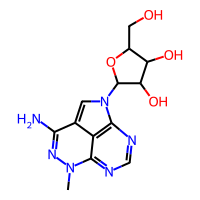
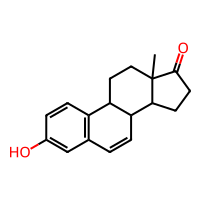
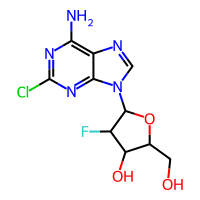
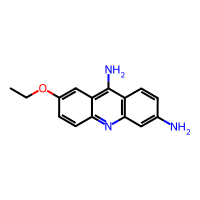
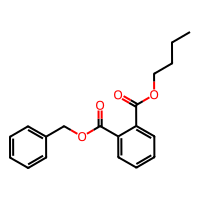
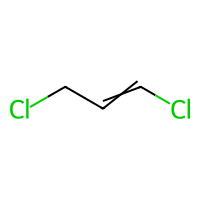
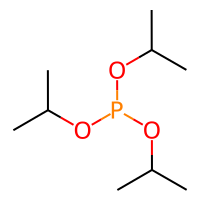
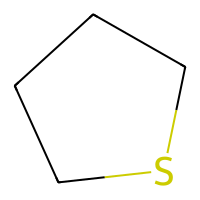
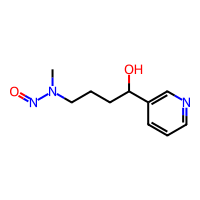
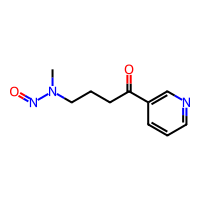

In [5]:
data

In [6]:
data['Antagonist Efficacy (%)'] = data['Antagonist Efficacy (%)'].astype('float64')

## 3. Visualization

In [7]:
# Visualize the DataFrame of the molecules within a grid
mols2grid.display(data, mol_col="Molecule", subset = ['Viability Activity', 'Antagonist Efficacy (%)'],
                  transform = {"Antagonist Efficacy (%)": lambda x: f"{x:.2f}"})

MolGridWidget()

## 4. Morgan Fingerprints

Morgan fingerprints are circular fingerprints, meaning they encode the environment around each atom in a molecule up to a certain radius. The radius determines how many bonds away from each atom the fingerprint considers. A radius of 2, for instance, would consider two bonds away from each atom.

**Chemical features:** Donor, Acceptor, Aromatic, Halogen, Basic, Acidi

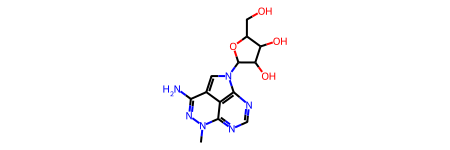

In [8]:
first_molecule = data.iloc[0]['Molecule']
first_molecule

The `GetMorganFingerprintAsBitVect` function generates Morgan fingerprints, which are subsequently transformed into a numpy array. This vector consists of 0s and 1s: a '1' indicates the presence of a specific molecular feature, and a '0' denotes its absence.

In [9]:
bi ={}

fp = AllChem.GetMorganFingerprintAsBitVect(first_molecule, 2, nBits=2048, bitInfo=bi)
fp_arr = np.zeros((0,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
fp_arr

array([0., 0., 0., ..., 0., 0., 0.])

In [10]:
np.nonzero(fp_arr) # = list(fp.GetOnBits())

(array([  75,   80,  109,  130,  149,  209,  222,  240,  272,  352,  378,
         454,  464,  489,  556,  577,  610,  653,  656,  807,  935, 1001,
        1019, 1030, 1057, 1099, 1145, 1171, 1176, 1202, 1234, 1257, 1380,
        1452, 1457, 1487, 1516, 1573, 1696, 1749, 1764, 1810, 1844, 1873,
        1921, 1953, 1958, 1984]),)

In [11]:
print(list(fp.GetOnBits()))

[75, 80, 109, 130, 149, 209, 222, 240, 272, 352, 378, 454, 464, 489, 556, 577, 610, 653, 656, 807, 935, 1001, 1019, 1030, 1057, 1099, 1145, 1171, 1176, 1202, 1234, 1257, 1380, 1452, 1457, 1487, 1516, 1573, 1696, 1749, 1764, 1810, 1844, 1873, 1921, 1953, 1958, 1984]


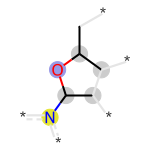

In [12]:
#Display the feature that turn a bit ON
Draw.DrawMorganBit(first_molecule, 75, bi)

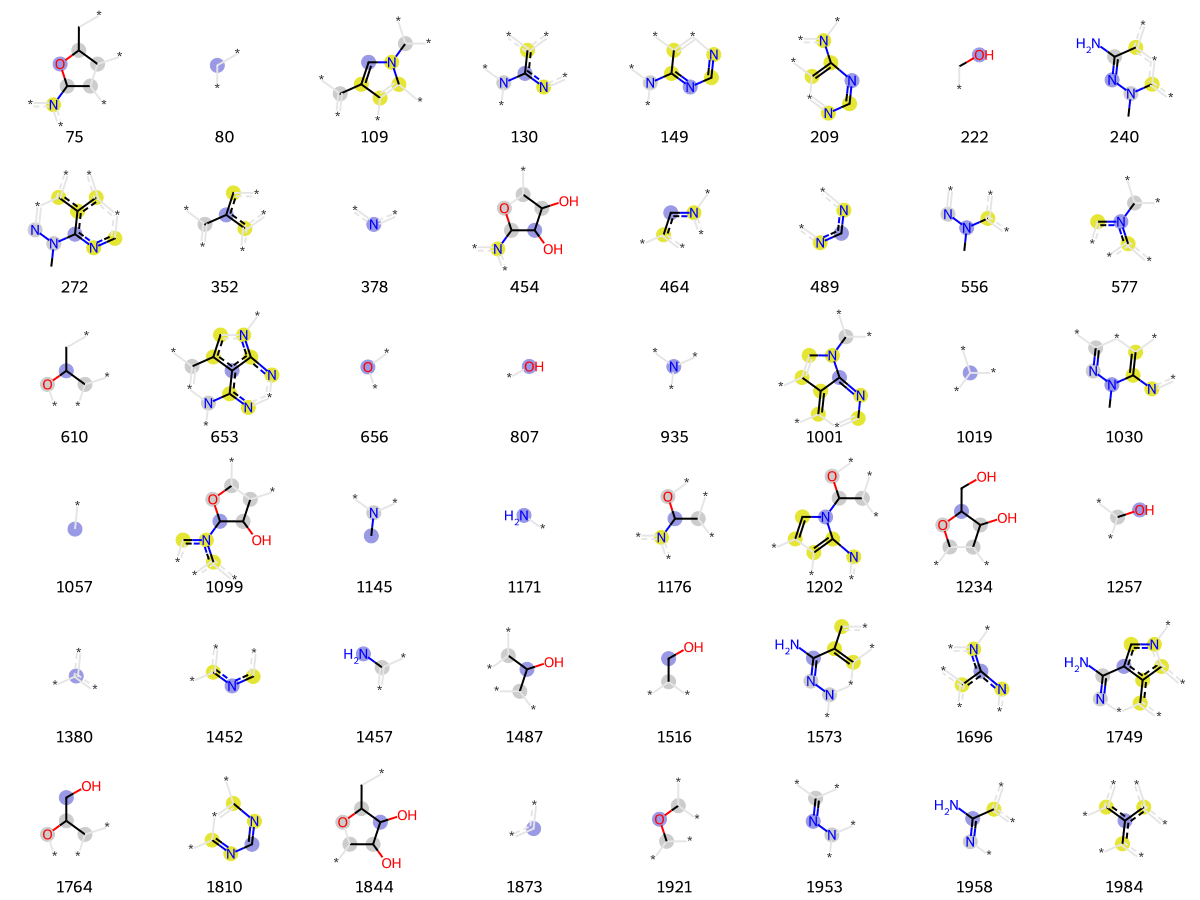

In [13]:
# From https://rdkit.blogspot.com/2018/10/using-new-fingerprint-bit-rendering-code.html
prints = [(first_molecule, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints,molsPerRow=8,legends=[str(x) for x in fp.GetOnBits()])

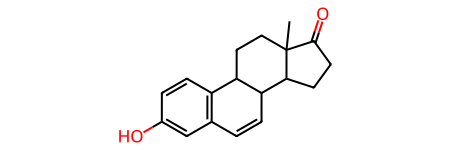

In [14]:
second_molecule = data.iloc[1]['Molecule']
second_molecule

In [15]:
bi = {}

fp2 = AllChem.GetMorganFingerprintAsBitVect(second_molecule, 2, nBits=2048, bitInfo=bi)
print(list(fp2.GetOnBits()))

[61, 121, 140, 239, 302, 314, 381, 455, 519, 547, 625, 650, 745, 758, 807, 875, 926, 1019, 1027, 1039, 1056, 1057, 1060, 1083, 1089, 1162, 1274, 1313, 1316, 1325, 1380, 1448, 1598, 1602, 1730, 1738, 1750, 1855, 1873, 1884, 1926]


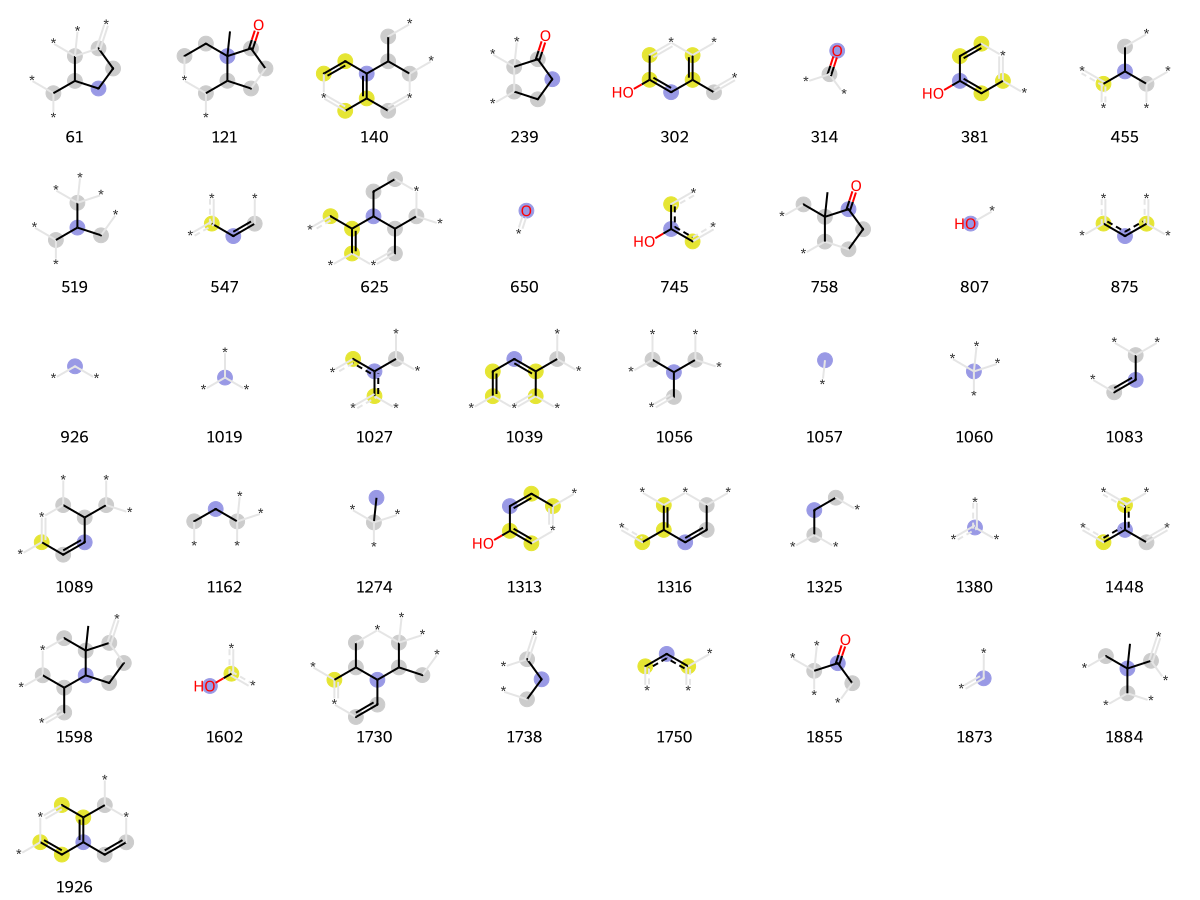

In [16]:
prints = [(second_molecule, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints,molsPerRow=8,legends=[str(x) for x in fp2.GetOnBits()])

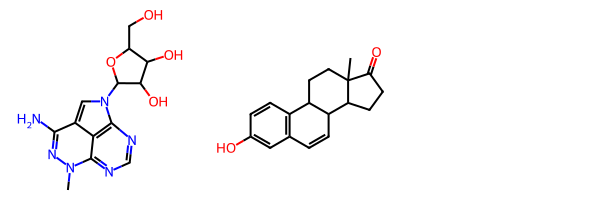

In [17]:
img = Draw.MolsToGridImage([first_molecule, second_molecule])
img

**Calculating similarity between fingerprints**

**Tanimoto Similarity (Jaccard Similarity)**<sup>[8](http://dx.doi.org/10.1039/B409813G)</sup>

Tanimoto Similarity, often known as the Jaccard Similarity, is a measure used to compare the similarity and diversity of sample sets. In cheminformatics, it's frequently applied to compare molecular fingerprints, which are binary vectors signifying the presence or absence of particular molecular attributes. It's important to point that the relationship between molecular descriptors and biological activity isn't always linear, and the degree of similarity required for consistent behavior depends on the specific activity. Also, the inherent properties of binary molecular representations might have a big effect on similarity outcomes. For instance, small structural alterations can cause notable shifts in molecular properties and receptor perception.<sup>[8](http://dx.doi.org/10.1039/B409813G)</sup>

The Tanimoto Similarity $T$ between two sets $A$ and $B$ (or two binary vectors) is given by:


$$T(A,B) = \frac{|A \cap B|}{|A \cup B|}$$


When applied to binary molecular fingerprints, this can be translated as:

$$T(f_1, f_2) = \frac{\text{number of bits set in both } f_1 \text{ and } f_2}{\text{number of bits set in either } f_1 \text{ or } f_2}$$

Where:
- $f_1$ and $f_2$ are two binary molecular fingerprints.
- The numerator counts the bits that are set (i.e., equal to 1) in both fingerprints.
- The denominator counts the bits that are set in either of the two fingerprints.

Tanimoto Similarity values span between 0 and 1:
- A value of 1 indicates the two fingerprints are identical.
- A value of 0 means the two fingerprints share no common bits.


In [18]:
print('first_molecule', list(fp.GetOnBits()))
print('second_molecule', list(fp2.GetOnBits()))

first_molecule [75, 80, 109, 130, 149, 209, 222, 240, 272, 352, 378, 454, 464, 489, 556, 577, 610, 653, 656, 807, 935, 1001, 1019, 1030, 1057, 1099, 1145, 1171, 1176, 1202, 1234, 1257, 1380, 1452, 1457, 1487, 1516, 1573, 1696, 1749, 1764, 1810, 1844, 1873, 1921, 1953, 1958, 1984]
second_molecule [61, 121, 140, 239, 302, 314, 381, 455, 519, 547, 625, 650, 745, 758, 807, 875, 926, 1019, 1027, 1039, 1056, 1057, 1060, 1083, 1089, 1162, 1274, 1313, 1316, 1325, 1380, 1448, 1598, 1602, 1730, 1738, 1750, 1855, 1873, 1884, 1926]


In [19]:
DataStructs.TanimotoSimilarity(fp, fp2)

0.05952380952380952

In [20]:
DataStructs.FingerprintSimilarity(fp,fp2) # = TanimotoSimilarity

0.05952380952380952

However, `FingerprintSimilarity` function can compute different types of similarity coefficients depending on an optional third argument (e.g., Dice, Cosine, etc.). If no third argument is provided, it defaults to Tanimoto.

In [21]:
print(f"The DiceSimilarity between first and second molecule is: {DataStructs.FingerprintSimilarity(fp,fp2, metric=DataStructs.DiceSimilarity)}")
print(f"The CosineSimilarity between first and second molecule is: {DataStructs.FingerprintSimilarity(fp,fp2, metric=DataStructs.CosineSimilarity)}")
print(f"The TanimotoSimilarity between first and second molecule is: {DataStructs.FingerprintSimilarity(fp,fp2)}")

The DiceSimilarity between first and second molecule is: 0.11235955056179775
The CosineSimilarity between first and second molecule is: 0.11270870433342903
The TanimotoSimilarity between first and second molecule is: 0.05952380952380952


**So, let's generalize to our dataset**

**Let's apply it to the whole dataset**

**Option 1 - np.array as an object in the dataframe**


---

In [22]:
df_morgan = data.copy()
df_morgan['Morgan'] = data['Molecule'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, radius=2, nBits=2048))
df_morgan.head()

PUBCHEM_SMILES PUBCHEM_ACTIVITY_OUTCOME  \
0  CN1C2=NC=NC3=C2C(=CN3[C@H]4[C@@H]([C@@H]([C@H]...                   Active   
1  C[C@]12CC[C@H]3C(=CCC4=C3C=CC(=C4)O)[C@@H]1CCC2=O                   Active   
2  C1=NC2=C(N=C(N=C2N1[C@H]3[C@H]([C@@H]([C@H](O3...                   Active   
3  CCOC1=CC2=C(C3=C(C=C(C=C3)N)N=C2C=C1)N.CC(C(=O...                   Active   
4            CCCCOC(=O)C1=CC=CC=C1C(=O)OCC2=CC=CC=C2                   Active   

  Antagonist Activity Viability Activity  Antagonist Efficacy (%) ID  \
0   active antagonist           inactive                 -37.5702      
1   active antagonist           inactive                 -37.9252      
2   active antagonist           inactive                 -35.8470      
3   active antagonist           inactive                 -35.5194      
4   active antagonist           inactive                 -39.4007      

                                           Molecule  \
0  <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca180>   
1  <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca3b0>   
2  <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca420>   
3  <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca500>   
4  <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca5e0>   

                                              Morgan  
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...

In [23]:
df_morgan['Morgan'].dtypes

dtype('O')

**Option 2**


---

In [24]:
def morgan_fpts(data, nBits=2048):
    """
    Generate Morgan fingerprints (circular fingerprints) for a list of RDKit molecule objects.

    Parameters:
    - data (list of RDKit Mol): List of RDKit Mol objects representing molecules.
    - nBits (int, optional): Desired size of the output fingerprint. Default is 2048 bits.

    Returns:
    - tuple:
        - numpy.ndarray: An array where each row corresponds to the Morgan fingerprint of a molecule.
                         Each fingerprint is a binary array of size `nBits`.
        - list: A list of dictionaries where each dictionary contains the bit information (indices of non-zero bits)
                for the corresponding molecule's fingerprint.
        - list: A list of ExplicitBitVect objects representing the fingerprints.

    Note:
    - This function was inspired by: https://github.com/gashawmg/molecular-descriptors
    """

    Morgan_fpts = []
    bitInfos = []
    fpts_objects = []
    for mol in data:
        bitInfo = {}
        fpts = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits, bitInfo=bitInfo)
        fpts_objects.append(fpts)
        mfpts = np.array(fpts)
        Morgan_fpts.append(mfpts)
        bitInfos.append(bitInfo)
    return np.array(Morgan_fpts), bitInfos, fpts_objects

In [25]:
morgan_fpts, bitInfos, fpts_objects = morgan_fpts(data['Molecule'])
morgan_fpts.shape

(5134, 2048)

In [26]:
morgan_finpr = pd.DataFrame(morgan_fpts,columns=['Col_{}'.format(i) for i in range(morgan_fpts.shape[1])])
morgan_finpr

Col_0  Col_1  Col_2  Col_3  Col_4  Col_5  Col_6  Col_7  Col_8  Col_9  \
0         0      0      0      0      0      0      0      0      0      0   
1         0      0      0      0      0      0      0      0      0      0   
2         0      0      0      0      0      0      0      0      0      0   
3         0      0      0      0      0      0      0      0      0      0   
4         0      0      0      0      0      0      0      0      0      0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5129      0      0      0      0      0      0      0      0      0      0   
5130      0      1      0      0      0      0      0      0      0      0   
5131      0      0      0      0      0      0      0      0      0      0   
5132      0      1      0      0      0      0      0      0      0      0   
5133      0      0      0      0      0      0      0      0      0      0   

      ...  Col_2038  Col_2039  Col_2040  Col_2041  Col_2042  Col_2043  \
0     ...         0         0         0         0         0         0   
1     ...         0         0         0         0         0         0   
2     ...         0         0         0         0         0         0   
3     ...         0         0         0         0         0         0   
4     ...         0         0         0         0         1         0   
...   ...       ...       ...       ...       ...       ...       ...   
5129  ...         0         0         0         0         0         0   
5130  ...         0         0         0         0         0         0   
5131  ...         0         0         0         0         0         0   
5132  ...         0         0         0         0         0         0   
5133  ...         0         0         0         0         0         0   

      Col_2044  Col_2045  Col_2046  Col_2047  
0            0         0         0         0  
1            0         0         0         0  
2            0         0         0         0  
3            0         0         0         0  
4            0         0         0         0  
...        ...       ...       ...       ...  
5129         0         0         0         0  
5130         0         0         0         0  
5131         0         0         0         0  
5132         0         0         0         0  
5133         0         0         0         0  

[5134 rows x 2048 columns]

In [27]:
pd.concat([data, morgan_finpr], axis=1).to_csv('morgan_fps.csv', index=False)

In [28]:
np.nonzero(fpts_objects[16])

(array([   4,   24,   43,   80,  180,  294,  348,  378,  405,  412,  460,
         489,  603,  875,  881,  884,  932,  935,  943, 1014, 1057, 1123,
        1380, 1452, 1520, 1687, 1722, 1731, 1800, 1855, 1873]),)

In [29]:
len(list(fpts_objects[16].GetOnBits()))

31

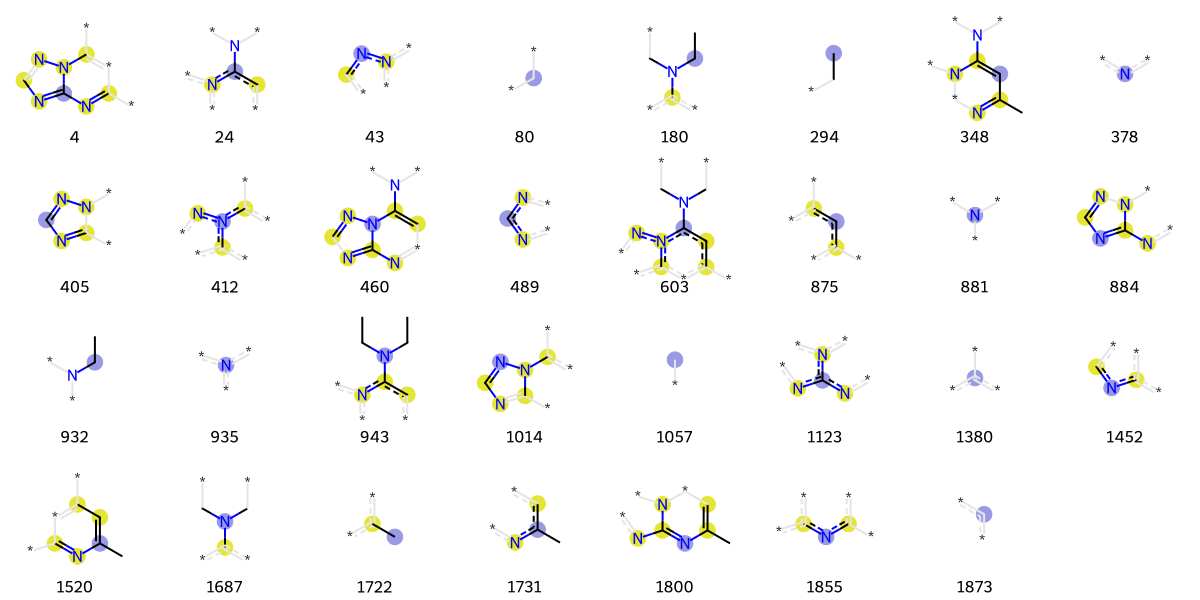

In [30]:
prints = [(data['Molecule'][16], x, bitInfos[16]) for x in fpts_objects[16].GetOnBits()]
Draw.DrawMorganBits(prints,molsPerRow=8,legends=[str(x) for x in fpts_objects[16].GetOnBits()])

**Differences between the dataframes:**

- **Representation:** The primary difference is in the representation of the fingerprints. In df_morgan (option 1), the Morgan fingerprint for each molecule is stored as an object (**`ExplicitBitVect`**), while in morgan_finpr (option 2), the fingerprint is spread across 2048 columns as individual bits.
- **Data Accessibility:** The option 2 format is "better" for direct numerical and machine learning analyses since the fingerprints are already spread out as individual features. In contrast, the option 1 requires further processing to convert the ExplicitBitVect objects into a numerical format suitable for analysis.

## Avalon Fingerprint

The Avalon fingerprint is a molecular fingerprinting method designed for fast similarity searching and cheminformatics machine learning. It uses a combination of hashed atom environments and a layered approach to generate binary fingerprints.

In [31]:
from rdkit.Avalon import pyAvalonTools

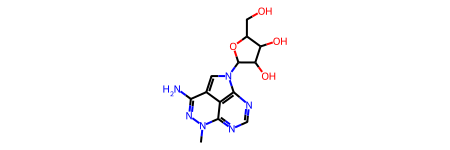

In [32]:
first_molecule

In [33]:
av_fpr1 = pyAvalonTools.GetAvalonFP(first_molecule, nBits=2048)
print(np.array(av_fpr1))

[0 0 1 ... 0 0 1]


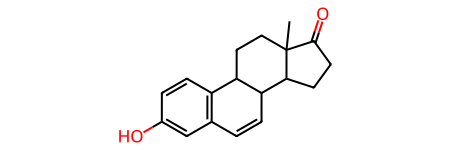

In [34]:
second_molecule

In [35]:
av_fpr2 = pyAvalonTools.GetAvalonFP(second_molecule, nBits=2048)
print(np.array(av_fpr2))

[0 0 0 ... 0 1 0]


In [36]:
print('first_molecule', list(av_fpr1.GetOnBits()))
print('second_molecule', list(av_fpr2.GetOnBits()))

first_molecule [2, 3, 4, 15, 24, 27, 28, 30, 36, 41, 49, 59, 60, 63, 64, 72, 73, 78, 81, 83, 84, 85, 86, 91, 93, 94, 96, 103, 105, 109, 114, 117, 118, 125, 128, 139, 145, 147, 148, 149, 151, 155, 157, 181, 185, 186, 190, 198, 199, 202, 221, 224, 228, 232, 234, 242, 245, 250, 251, 254, 258, 259, 263, 265, 266, 267, 270, 271, 274, 277, 280, 287, 289, 292, 308, 312, 314, 316, 318, 319, 322, 323, 325, 333, 334, 341, 342, 343, 345, 346, 347, 348, 349, 355, 356, 366, 375, 384, 385, 398, 403, 407, 411, 412, 413, 415, 425, 442, 444, 446, 447, 448, 453, 455, 456, 460, 464, 467, 472, 474, 479, 480, 482, 486, 488, 490, 493, 498, 502, 503, 504, 512, 518, 519, 521, 522, 528, 534, 539, 541, 553, 555, 560, 566, 571, 572, 573, 576, 579, 584, 586, 589, 591, 592, 594, 600, 612, 628, 629, 635, 638, 644, 649, 651, 657, 658, 664, 665, 670, 671, 677, 689, 691, 694, 695, 702, 705, 708, 713, 715, 729, 731, 734, 742, 744, 750, 766, 778, 785, 787, 788, 790, 800, 809, 810, 815, 816, 818, 821, 822, 823, 830, 832,

Let's compute the Tanimoto Similarity

In [37]:
DataStructs.TanimotoSimilarity(av_fpr1, av_fpr2)

0.15146831530139104

**Let's apply it to the whole dataset**

**Option 1**


---

In [38]:
#For all the molecules of the DataFrame
df_avalon = data.copy()
df_avalon['Avalon'] = data['Molecule'].apply(lambda x: pyAvalonTools.GetAvalonFP(x, nBits=2048))
df_avalon

PUBCHEM_SMILES  \
0     CN1C2=NC=NC3=C2C(=CN3[C@H]4[C@@H]([C@@H]([C@H]...   
1     C[C@]12CC[C@H]3C(=CCC4=C3C=CC(=C4)O)[C@@H]1CCC2=O   
2     C1=NC2=C(N=C(N=C2N1[C@H]3[C@H]([C@@H]([C@H](O3...   
3     CCOC1=CC2=C(C3=C(C=C(C=C3)N)N=C2C=C1)N.CC(C(=O...   
4               CCCCOC(=O)C1=CC=CC=C1C(=O)OCC2=CC=CC=C2   
...                                                 ...   
5129                                       C(/C=C\Cl)Cl   
5130                              CC(C)OP(OC(C)C)OC(C)C   
5131                                            C1CCSC1   
5132                          CN(CCCC(C1=CN=CC=C1)O)N=O   
5133                         CN(CCCC(=O)C1=CN=CC=C1)N=O   

     PUBCHEM_ACTIVITY_OUTCOME Antagonist Activity Viability Activity  \
0                      Active   active antagonist           inactive   
1                      Active   active antagonist           inactive   
2                      Active   active antagonist           inactive   
3                      Active   active antagonist           inactive   
4                      Active   active antagonist           inactive   
...                       ...                 ...                ...   
5129                 Inactive            inactive           inactive   
5130                 Inactive            inactive           inactive   
5131                 Inactive            inactive           inactive   
5132                 Inactive            inactive           inactive   
5133                 Inactive            inactive           inactive   

      Antagonist Efficacy (%) ID  \
0                    -37.5702      
1                    -37.9252      
2                    -35.8470      
3                    -35.5194      
4                    -39.4007      
...                       ... ..   
5129                   0.0000      
5130                   0.0000      
5131                   0.0000      
5132                   0.0000      
5133                   0.0000      

                                              Molecule  \
0     <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca180>   
1     <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca3b0>   
2     <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca420>   
3     <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca500>   
4     <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca5e0>   
...                                                ...   
5129  <rdkit.Chem.rdchem.Mol object at 0x7cbf3d57adc0>   
5130  <rdkit.Chem.rdchem.Mol object at 0x7cbf3d57ae30>   
5131  <rdkit.Chem.rdchem.Mol object at 0x7cbf3d57aea0>   
5132  <rdkit.Chem.rdchem.Mol object at 0x7cbf3d57af10>   
5133  <rdkit.Chem.rdchem.Mol object at 0x7cbf3d57af80>   

                                                 Avalon  
0     [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1     [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  
2     [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
...                                                 ...  
5129  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
5130  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
5131  [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
5132  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
5133  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  

[5134 rows x 8 columns]

In [39]:
def avalon_finpr(data, nBits=2048):

    avalon_finpr = []

    for mol in data:
        av_fpr1 = pyAvalonTools.GetAvalonFP(first_molecule, nBits)
        avalon_finpr.append(av_fpr1)
    return avalon_finpr

**Option 2**


---

In [40]:
def avalon_fps(data, nBits=2048): #To costume the desire nBits
    """Generate Avalon fingerprints for a list of SMILES strings.

    Parameters:
    - data (list of str): List of SMILES strings representing molecules.
    - nBits (int, optional): Desired size of the output fingerprint. Default is 2048 bits.

    Returns:
    - numpy.ndarray: An array where each row corresponds to the Avalon fingerprint of a molecule.
                     Each fingerprint is a binary array of size `nBits`."""
    Avalon_fps = []
    for mol in data:
        fp = pyAvalonTools.GetAvalonFP(mol, nBits)
        Avalon_fps.append(fp)
    return np.array(Avalon_fps)

In [41]:
avalon_fpts = avalon_fps(data['Molecule'])

In [42]:
avalon_fpts.shape

(5134, 2048)

In [43]:
avalon_finpr = pd.DataFrame(avalon_fpts,columns=['Col_{}'.format(i) for i in range(avalon_fpts.shape[1])])
avalon_finpr

Col_0  Col_1  Col_2  Col_3  Col_4  Col_5  Col_6  Col_7  Col_8  Col_9  \
0         0      0      1      1      1      0      0      0      0      0   
1         0      0      0      0      1      0      0      0      0      1   
2         1      0      0      0      1      0      0      0      0      0   
3         0      0      0      0      0      0      0      0      0      0   
4         0      0      0      0      0      0      0      0      0      0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5129      0      0      0      0      0      0      0      0      0      0   
5130      0      0      0      0      0      0      0      0      0      0   
5131      1      0      0      0      1      0      0      0      0      0   
5132      0      0      0      0      0      0      0      0      0      0   
5133      0      0      0      0      0      0      0      0      0      0   

      ...  Col_2038  Col_2039  Col_2040  Col_2041  Col_2042  Col_2043  \
0     ...         0         1         0         0         0         0   
1     ...         0         0         0         1         0         0   
2     ...         0         0         1         0         0         0   
3     ...         0         0         0         0         0         0   
4     ...         0         0         0         0         0         0   
...   ...       ...       ...       ...       ...       ...       ...   
5129  ...         0         0         0         1         0         0   
5130  ...         0         0         0         0         0         0   
5131  ...         0         0         0         0         0         0   
5132  ...         0         0         0         0         0         0   
5133  ...         0         0         0         0         0         0   

      Col_2044  Col_2045  Col_2046  Col_2047  
0            0         0         0         1  
1            0         0         1         0  
2            1         0         0         1  
3            0         0         0         0  
4            0         0         0         0  
...        ...       ...       ...       ...  
5129         0         0         0         0  
5130         0         0         0         0  
5131         0         0         0         0  
5132         0         0         0         0  
5133         0         0         1         0  

[5134 rows x 2048 columns]

In [44]:
pd.concat([data, avalon_finpr], axis=1).to_csv('avalon_fps.csv', index=False)

## Molecular ACCess System keys (MACCS) Keys

The MACCS fingerprint has a fixed length of 166 bits, with each bit corresponding to a specific pre-defined substructural feature.

In [45]:
from rdkit.Chem import MACCSkeys

In [46]:
#For the first molecule of the DataFrame
maccs_fp = MACCSkeys.GenMACCSKeys(data['Molecule'][0])
print(np.array(maccs_fp))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0
 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1
 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0]


In [47]:
np.nonzero(maccs_fp)

(array([ 38,  52,  53,  54,  57,  62,  65,  72,  75,  77,  78,  79,  80,
         82,  83,  84,  85,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98, 101, 105, 109, 110, 117, 119, 120, 121, 122, 124, 125, 127,
        131, 132, 133, 135, 137, 139, 140, 142, 143, 145, 146, 148, 150,
        151, 152, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
        165]),)

In [48]:
#For the second molecule of the DataFrame
maccs_fp2 = MACCSkeys.GenMACCSKeys(data['Molecule'][1])
print(np.array(maccs_fp2))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0
 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0]


In [49]:
print('first_molecule', list(maccs_fp.GetOnBits()))
print('second_molecule', list(maccs_fp2.GetOnBits()))

first_molecule [38, 52, 53, 54, 57, 62, 65, 72, 75, 77, 78, 79, 80, 82, 83, 84, 85, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 105, 109, 110, 117, 119, 120, 121, 122, 124, 125, 127, 131, 132, 133, 135, 137, 139, 140, 142, 143, 145, 146, 148, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165]
second_molecule [66, 96, 99, 101, 105, 108, 112, 113, 115, 116, 118, 127, 128, 129, 132, 139, 143, 144, 145, 147, 150, 152, 154, 157, 159, 160, 162, 163, 164, 165]


In [50]:
DataStructs.TanimotoSimilarity(maccs_fp, maccs_fp2)

0.21518987341772153

**Let's generate the fingerprints for the whole dataset**

**Option 1**


---

In [51]:
#For all the molecules of the DataFrame
df_maccs = data.copy()
df_maccs['MACCS'] = data['Molecule'].apply(MACCSkeys.GenMACCSKeys)
df_maccs

PUBCHEM_SMILES  \
0     CN1C2=NC=NC3=C2C(=CN3[C@H]4[C@@H]([C@@H]([C@H]...   
1     C[C@]12CC[C@H]3C(=CCC4=C3C=CC(=C4)O)[C@@H]1CCC2=O   
2     C1=NC2=C(N=C(N=C2N1[C@H]3[C@H]([C@@H]([C@H](O3...   
3     CCOC1=CC2=C(C3=C(C=C(C=C3)N)N=C2C=C1)N.CC(C(=O...   
4               CCCCOC(=O)C1=CC=CC=C1C(=O)OCC2=CC=CC=C2   
...                                                 ...   
5129                                       C(/C=C\Cl)Cl   
5130                              CC(C)OP(OC(C)C)OC(C)C   
5131                                            C1CCSC1   
5132                          CN(CCCC(C1=CN=CC=C1)O)N=O   
5133                         CN(CCCC(=O)C1=CN=CC=C1)N=O   

     PUBCHEM_ACTIVITY_OUTCOME Antagonist Activity Viability Activity  \
0                      Active   active antagonist           inactive   
1                      Active   active antagonist           inactive   
2                      Active   active antagonist           inactive   
3                      Active   active antagonist           inactive   
4                      Active   active antagonist           inactive   
...                       ...                 ...                ...   
5129                 Inactive            inactive           inactive   
5130                 Inactive            inactive           inactive   
5131                 Inactive            inactive           inactive   
5132                 Inactive            inactive           inactive   
5133                 Inactive            inactive           inactive   

      Antagonist Efficacy (%) ID  \
0                    -37.5702      
1                    -37.9252      
2                    -35.8470      
3                    -35.5194      
4                    -39.4007      
...                       ... ..   
5129                   0.0000      
5130                   0.0000      
5131                   0.0000      
5132                   0.0000      
5133                   0.0000      

                                              Molecule  \
0     <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca180>   
1     <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca3b0>   
2     <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca420>   
3     <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca500>   
4     <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca5e0>   
...                                                ...   
5129  <rdkit.Chem.rdchem.Mol object at 0x7cbf3d57adc0>   
5130  <rdkit.Chem.rdchem.Mol object at 0x7cbf3d57ae30>   
5131  <rdkit.Chem.rdchem.Mol object at 0x7cbf3d57aea0>   
5132  <rdkit.Chem.rdchem.Mol object at 0x7cbf3d57af10>   
5133  <rdkit.Chem.rdchem.Mol object at 0x7cbf3d57af80>   

                                                  MACCS  
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
...                                                 ...  
5129  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
5130  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
5131  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
5132  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
5133  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  

[5134 rows x 8 columns]

**Option 2**


---

In [52]:
def maccs_fps(data):
    """Generate MACCS fingerprints for a list of SMILES strings.

    Parameters:
    - data (list of RDKit Mol): List of RDKit Mol objects representing molecules.

    Returns:
    - numpy.ndarray: An array where each row corresponds to the MACCS fingerprint of a molecule.
                     Each fingerprint is a fixed-length (typically 166-bits) binary array."""

    MACCS_fps = []
    for mol in data:
        fp = MACCSkeys.GenMACCSKeys(mol)
        MACCS_fps.append(fp)
    return np.array(MACCS_fps)

In [53]:
maccs_fps = maccs_fps(data['Molecule'])
maccs_fps.shape

(5134, 167)

In [54]:
maccs_fps

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0]])

In [55]:
maccs_fps = pd.DataFrame(maccs_fps,columns=['Col_{}'.format(i) for i in range(maccs_fps.shape[1])])
maccs_fps

Col_0  Col_1  Col_2  Col_3  Col_4  Col_5  Col_6  Col_7  Col_8  Col_9  \
0         0      0      0      0      0      0      0      0      0      0   
1         0      0      0      0      0      0      0      0      0      0   
2         0      0      0      0      0      0      0      0      0      0   
3         0      0      0      0      0      0      0      0      0      0   
4         0      0      0      0      0      0      0      0      0      0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5129      0      0      0      0      0      0      0      0      0      0   
5130      0      0      0      0      0      0      0      0      0      0   
5131      0      0      0      0      0      0      0      0      0      0   
5132      0      0      0      0      0      0      0      0      0      0   
5133      0      0      0      0      0      0      0      0      0      0   

      ...  Col_157  Col_158  Col_159  Col_160  Col_161  Col_162  Col_163  \
0     ...        1        1        1        1        1        1        1   
1     ...        1        0        1        1        0        1        1   
2     ...        1        1        1        0        1        1        1   
3     ...        1        1        0        1        1        1        1   
4     ...        1        0        1        1        0        1        1   
...   ...      ...      ...      ...      ...      ...      ...      ...   
5129  ...        0        0        0        0        0        0        0   
5130  ...        1        0        1        1        0        0        0   
5131  ...        0        0        0        0        0        0        0   
5132  ...        1        1        1        1        1        1        1   
5133  ...        0        1        1        1        1        1        1   

      Col_164  Col_165  Col_166  
0           1        1        0  
1           1        1        0  
2           1        1        0  
3           1        1        0  
4           1        1        0  
...       ...      ...      ...  
5129        0        0        0  
5130        1        0        0  
5131        0        1        0  
5132        1        1        0  
5133        1        1        0  

[5134 rows x 167 columns]

In [56]:
pd.concat([data, maccs_fps], axis=1).to_csv('maccs_fps.csv', index=False)

In [57]:
#It gives a dictionary with the SMARTS patterns used for generating MACCS keys
MACCSkeys.smartsPatts

{1: ('?', 0),
 2: ('[#104]', 0),
 3: ('[#32,#33,#34,#50,#51,#52,#82,#83,#84]', 0),
 4: ('[Ac,Th,Pa,U,Np,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No,Lr]', 0),
 5: ('[Sc,Ti,Y,Zr,Hf]', 0),
 6: ('[La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu]', 0),
 7: ('[V,Cr,Mn,Nb,Mo,Tc,Ta,W,Re]', 0),
 8: ('[!#6;!#1]1~*~*~*~1', 0),
 9: ('[Fe,Co,Ni,Ru,Rh,Pd,Os,Ir,Pt]', 0),
 10: ('[Be,Mg,Ca,Sr,Ba,Ra]', 0),
 11: ('*1~*~*~*~1', 0),
 12: ('[Cu,Zn,Ag,Cd,Au,Hg]', 0),
 13: ('[#8]~[#7](~[#6])~[#6]', 0),
 14: ('[#16]-[#16]', 0),
 15: ('[#8]~[#6](~[#8])~[#8]', 0),
 16: ('[!#6;!#1]1~*~*~1', 0),
 17: ('[#6]#[#6]', 0),
 18: ('[#5,#13,#31,#49,#81]', 0),
 19: ('*1~*~*~*~*~*~*~1', 0),
 20: ('[#14]', 0),
 21: ('[#6]=[#6](~[!#6;!#1])~[!#6;!#1]', 0),
 22: ('*1~*~*~1', 0),
 23: ('[#7]~[#6](~[#8])~[#8]', 0),
 24: ('[#7]-[#8]', 0),
 25: ('[#7]~[#6](~[#7])~[#7]', 0),
 26: ('[#6]=;@[#6](@*)@*', 0),
 27: ('[I]', 0),
 28: ('[!#6;!#1]~[CH2]~[!#6;!#1]', 0),
 29: ('[#15]', 0),
 30: ('[#6]~[!#6;!#1](~[#6])(~[#6])~*', 0),
 31: ('[!#6;!#1]~[F,Cl,Br,I]',

In [58]:
np.nonzero(maccs_fp)[0]

array([ 38,  52,  53,  54,  57,  62,  65,  72,  75,  77,  78,  79,  80,
        82,  83,  84,  85,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98, 101, 105, 109, 110, 117, 119, 120, 121, 122, 124, 125, 127,
       131, 132, 133, 135, 137, 139, 140, 142, 143, 145, 146, 148, 150,
       151, 152, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165])

In [59]:
# Select the present fragments and visualize
present_list = np.nonzero(maccs_fp)[0]
smarts_patterns = list(map(MACCSkeys.smartsPatts.get, present_list))
smarts_patterns

[('[#7]~[#6](~[#6])~[#7]', 0),
 ('[#7]~[#7]', 0),
 ('[!#6;!#1;!H0]~*~*~*~[!#6;!#1;!H0]', 0),
 ('[!#6;!#1;!H0]~*~*~[!#6;!#1;!H0]', 0),
 ('[#8R]', 0),
 ('*@*!@*@*', 0),
 ('c:n', 0),
 ('[#8]~*~*~[#8]', 0),
 ('*!@[#7]@*', 0),
 ('[#7]~*~[#7]', 0),
 ('[#6]=[#7]', 0),
 ('[#7]~*~*~[#7]', 0),
 ('[#7]~*~*~*~[#7]', 0),
 ('*~[CH2]~[!#6;!#1;!H0]', 0),
 ('[!#6;!#1]1~*~*~*~*~1', 0),
 ('[NH2]', 0),
 ('[#6]~[#7](~[#6])~[#6]', 0),
 ('[#8]~*~*~*~[#8]', 0),
 ('[$([!#6;!#1;!H0]~*~*~[CH2]~*),$([!#6;!#1;!H0;R]1@[R]@[R]@[CH2;R]1),$([!#6;!#1;!H0]~[R]1@[R]@[CH2;R]1)]',
  0),
 ('[$([!#6;!#1;!H0]~*~*~*~[CH2]~*),$([!#6;!#1;!H0;R]1@[R]@[R]@[R]@[CH2;R]1),$([!#6;!#1;!H0]~[R]1@[R]@[R]@[CH2;R]1),$([!#6;!#1;!H0]~*~[R]1@[R]@[CH2;R]1)]',
  0),
 ('[#8]~[#6](~[#7])~[#6]', 0),
 ('[!#6;!#1]~[CH3]', 0),
 ('[!#6;!#1]~[#7]', 0),
 ('[#7]~*~*~[#8]', 0),
 ('*1~*~*~*~*~1', 0),
 ('[#7]~*~*~*~[#8]', 0),
 ('[!#6;!#1]1~*~*~*~*~*~1', 0),
 ('[$([R]@1@[R]@[R]@[R]@[R]@[R]@[R]@[R]1),$([R]@1@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]1),$([R]@1@[R]@[R]@[

In [60]:
len(smarts_patterns)

66

## Atom-Pairs Fingerprint

An atom pair substructure is defined as a triplet of two (non-hydrogen) atoms and their shortest path distance in the molecular graph, i.e. (atom type 1, atom type 2, geodesic distance). In the standard RDKit implementation, distinct atom types are defined by tuples of atomic number, number of heavy atom neighbours, aromaticity and chirality. All unique triplets in a molecule are enumerated and stored in sparse count or bit vector format.

In [61]:
from rdkit.Chem import rdMolDescriptors

In [62]:
ap_fp = rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(first_molecule, nBits=512)
print(np.array(ap_fp))

[0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1
 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0
 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1
 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0
 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0
 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1
 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1
 1 0 0 1 1 1 0 1 1 1 0 1 

In [63]:
ap_fp2 = rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(second_molecule, nBits=512)
print(np.array(ap_fp2))

[1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1
 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1
 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 

In [64]:
print('first_molecule', list(ap_fp.GetOnBits()))
print('second_molecule', list(ap_fp2.GetOnBits()))

first_molecule [4, 5, 32, 36, 37, 38, 40, 48, 49, 52, 53, 54, 56, 57, 58, 60, 61, 62, 64, 65, 68, 69, 72, 73, 76, 80, 81, 82, 84, 88, 89, 90, 92, 93, 96, 100, 101, 102, 104, 105, 108, 109, 112, 116, 117, 118, 120, 124, 125, 126, 132, 133, 144, 148, 152, 153, 154, 155, 164, 165, 172, 184, 188, 189, 190, 192, 193, 194, 196, 197, 208, 209, 212, 213, 220, 221, 222, 224, 225, 226, 227, 228, 232, 233, 234, 236, 237, 238, 240, 241, 244, 245, 248, 252, 253, 256, 260, 264, 265, 268, 288, 289, 290, 292, 293, 300, 301, 304, 305, 306, 308, 316, 317, 320, 321, 324, 325, 326, 328, 329, 340, 341, 344, 345, 348, 349, 352, 353, 364, 368, 369, 372, 373, 376, 377, 378, 384, 385, 392, 393, 400, 404, 405, 408, 412, 413, 414, 416, 417, 420, 428, 429, 440, 448, 452, 456, 460, 464, 465, 466, 468, 469, 470, 472, 473, 474, 476, 477, 480, 481, 484, 485, 486, 488, 489, 490, 492, 493, 496, 497, 500, 501, 504, 505, 508]
second_molecule [0, 1, 4, 5, 12, 16, 17, 20, 21, 22, 23, 24, 25, 32, 33, 36, 40, 44, 48, 49, 50,

In [65]:
DataStructs.TanimotoSimilarity(ap_fp, ap_fp2)

0.37815126050420167

**Let's generate the fingerprints for the whole dataset**

**Option 1**


---

In [66]:
#For all the molecules of the DataFrame
df_ap = data.copy()
df_ap['Atom-Pairs'] = data['Molecule'].apply(lambda x: rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(x, nBits=2048))
df_ap

PUBCHEM_SMILES  \
0     CN1C2=NC=NC3=C2C(=CN3[C@H]4[C@@H]([C@@H]([C@H]...   
1     C[C@]12CC[C@H]3C(=CCC4=C3C=CC(=C4)O)[C@@H]1CCC2=O   
2     C1=NC2=C(N=C(N=C2N1[C@H]3[C@H]([C@@H]([C@H](O3...   
3     CCOC1=CC2=C(C3=C(C=C(C=C3)N)N=C2C=C1)N.CC(C(=O...   
4               CCCCOC(=O)C1=CC=CC=C1C(=O)OCC2=CC=CC=C2   
...                                                 ...   
5129                                       C(/C=C\Cl)Cl   
5130                              CC(C)OP(OC(C)C)OC(C)C   
5131                                            C1CCSC1   
5132                          CN(CCCC(C1=CN=CC=C1)O)N=O   
5133                         CN(CCCC(=O)C1=CN=CC=C1)N=O   

     PUBCHEM_ACTIVITY_OUTCOME Antagonist Activity Viability Activity  \
0                      Active   active antagonist           inactive   
1                      Active   active antagonist           inactive   
2                      Active   active antagonist           inactive   
3                      Active   active antagonist           inactive   
4                      Active   active antagonist           inactive   
...                       ...                 ...                ...   
5129                 Inactive            inactive           inactive   
5130                 Inactive            inactive           inactive   
5131                 Inactive            inactive           inactive   
5132                 Inactive            inactive           inactive   
5133                 Inactive            inactive           inactive   

      Antagonist Efficacy (%) ID  \
0                    -37.5702      
1                    -37.9252      
2                    -35.8470      
3                    -35.5194      
4                    -39.4007      
...                       ... ..   
5129                   0.0000      
5130                   0.0000      
5131                   0.0000      
5132                   0.0000      
5133                   0.0000      

                                              Molecule  \
0     <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca180>   
1     <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca3b0>   
2     <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca420>   
3     <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca500>   
4     <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca5e0>   
...                                                ...   
5129  <rdkit.Chem.rdchem.Mol object at 0x7cbf3d57adc0>   
5130  <rdkit.Chem.rdchem.Mol object at 0x7cbf3d57ae30>   
5131  <rdkit.Chem.rdchem.Mol object at 0x7cbf3d57aea0>   
5132  <rdkit.Chem.rdchem.Mol object at 0x7cbf3d57af10>   
5133  <rdkit.Chem.rdchem.Mol object at 0x7cbf3d57af80>   

                                             Atom-Pairs  
0     [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1     [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2     [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...  
3     [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4     [1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
...                                                 ...  
5129  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
5130  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
5131  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
5132  [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
5133  [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  

[5134 rows x 8 columns]

**Option 2**


---

In [67]:
def ap_fps(data, nBits=2048):
    """
    Generate Hashed Topological Torsion fingerprints for a list of SMILES strings.

    Parameters:
    - data (list of RDKit Mol): List of RDKit Mol objects representing molecules.
    - nBits: Desired size of the output fingerprint. Default is 2048 bits.

    Returns:
    - A numpy array of TT fingerprints.
    """
    AP_fps = []
    for mol in data:
        fp = rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(mol, nBits=nBits)
        AP_fps.append(fp)
    return np.array(AP_fps)

In [68]:
ap_fps = ap_fps(data['Molecule'])
ap_fps.shape

(5134, 2048)

In [69]:
ap_fps = pd.DataFrame(ap_fps,columns=['Col_{}'.format(i) for i in range(ap_fps.shape[1])])
ap_fps

Col_0  Col_1  Col_2  Col_3  Col_4  Col_5  Col_6  Col_7  Col_8  Col_9  \
0         0      0      0      0      1      1      0      0      0      0   
1         1      1      0      0      1      1      0      0      0      0   
2         0      0      0      0      1      0      0      0      0      0   
3         0      0      0      0      1      0      0      0      0      0   
4         1      1      1      0      1      1      0      0      0      0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5129      0      0      0      0      0      0      0      0      0      0   
5130      0      0      0      0      0      0      0      0      0      0   
5131      0      0      0      0      0      0      0      0      0      0   
5132      1      1      0      0      0      0      0      0      0      0   
5133      1      1      0      0      0      0      0      0      0      0   

      ...  Col_2038  Col_2039  Col_2040  Col_2041  Col_2042  Col_2043  \
0     ...         0         0         0         0         0         0   
1     ...         0         0         0         0         0         0   
2     ...         0         0         0         0         0         0   
3     ...         0         0         0         0         0         0   
4     ...         0         0         0         0         0         0   
...   ...       ...       ...       ...       ...       ...       ...   
5129  ...         0         0         0         0         0         0   
5130  ...         0         0         0         0         0         0   
5131  ...         0         0         0         0         0         0   
5132  ...         0         0         0         0         0         0   
5133  ...         0         0         0         0         0         0   

      Col_2044  Col_2045  Col_2046  Col_2047  
0            0         0         0         0  
1            0         0         0         0  
2            1         1         0         0  
3            0         0         0         0  
4            0         0         0         0  
...        ...       ...       ...       ...  
5129         0         0         0         0  
5130         0         0         0         0  
5131         0         0         0         0  
5132         0         0         0         0  
5133         0         0         0         0  

[5134 rows x 2048 columns]

In [70]:
pd.concat([data, ap_fps], axis=1).to_csv('atom-pair_fps.csv', index=False)

## Topological-Torsion Fingerprints

It captures information about a molecule based on the torsion angles between atoms.
It works with a sequence of four bonded atoms A−B−C−D in a molecule considering the atomic numbers and their connectivity. The TT descriptor captures local environment and connectivity information around each torsion in the molecule. The resulting fingerprint represents all the unique torsions in the molecule. They can be particularly useful when torsional angles play a crucial role in molecular activity or behavior, such as in specific types of molecular docking scenarios.

"They aim to complement the long-range relationships captured in atom pair fingerprints by representing short-range information contained in the torsion angles of a molecule."<sup>[8](https://www.blopig.com/blog/2022/06/exploring-topological-fingerprints-in-rdkit/)</sup>

In [71]:
from rdkit.Chem import rdMolDescriptors

In [72]:
tt_fp = rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(first_molecule, nBits=512)
print(np.array(tt_fp))

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 

In [73]:
#For the second molecule of the DataFrame
tt_fp2 = rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(second_molecule, nBits=512)
print(np.array(tt_fp2))

[1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 

In [74]:
print('first_molecule', list(tt_fp.GetOnBits()))
print('second_molecule', list(tt_fp2.GetOnBits()))

first_molecule [0, 40, 41, 88, 96, 97, 104, 124, 144, 156, 157, 160, 172, 173, 180, 181, 184, 204, 216, 228, 236, 248, 272, 273, 280, 288, 292, 300, 304, 305, 308, 320, 321, 372, 396, 397, 400, 416, 432, 433, 436, 440, 448, 449, 452, 453, 454, 456, 468, 480, 481, 496, 497, 500, 501, 504]
second_molecule [0, 1, 8, 12, 16, 24, 28, 29, 64, 65, 80, 104, 112, 124, 132, 140, 141, 156, 160, 168, 176, 177, 196, 197, 216, 217, 232, 248, 268, 288, 332, 340, 341, 344, 348, 349, 356, 376, 377, 380, 381, 404, 436, 444, 448, 468, 476, 480, 508, 509]


In [75]:
DataStructs.TanimotoSimilarity(tt_fp, tt_fp2)

0.1276595744680851

**Let's generate the fingerprints for the whole dataset**

**Option 1**


---

In [76]:
#For all the molecules of the DataFrame
df_tt = data.copy()
df_tt['Torsion'] = data['Molecule'].apply(lambda x: rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(x, nBits=2048))
df_tt

PUBCHEM_SMILES  \
0     CN1C2=NC=NC3=C2C(=CN3[C@H]4[C@@H]([C@@H]([C@H]...   
1     C[C@]12CC[C@H]3C(=CCC4=C3C=CC(=C4)O)[C@@H]1CCC2=O   
2     C1=NC2=C(N=C(N=C2N1[C@H]3[C@H]([C@@H]([C@H](O3...   
3     CCOC1=CC2=C(C3=C(C=C(C=C3)N)N=C2C=C1)N.CC(C(=O...   
4               CCCCOC(=O)C1=CC=CC=C1C(=O)OCC2=CC=CC=C2   
...                                                 ...   
5129                                       C(/C=C\Cl)Cl   
5130                              CC(C)OP(OC(C)C)OC(C)C   
5131                                            C1CCSC1   
5132                          CN(CCCC(C1=CN=CC=C1)O)N=O   
5133                         CN(CCCC(=O)C1=CN=CC=C1)N=O   

     PUBCHEM_ACTIVITY_OUTCOME Antagonist Activity Viability Activity  \
0                      Active   active antagonist           inactive   
1                      Active   active antagonist           inactive   
2                      Active   active antagonist           inactive   
3                      Active   active antagonist           inactive   
4                      Active   active antagonist           inactive   
...                       ...                 ...                ...   
5129                 Inactive            inactive           inactive   
5130                 Inactive            inactive           inactive   
5131                 Inactive            inactive           inactive   
5132                 Inactive            inactive           inactive   
5133                 Inactive            inactive           inactive   

      Antagonist Efficacy (%) ID  \
0                    -37.5702      
1                    -37.9252      
2                    -35.8470      
3                    -35.5194      
4                    -39.4007      
...                       ... ..   
5129                   0.0000      
5130                   0.0000      
5131                   0.0000      
5132                   0.0000      
5133                   0.0000      

                                              Molecule  \
0     <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca180>   
1     <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca3b0>   
2     <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca420>   
3     <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca500>   
4     <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca5e0>   
...                                                ...   
5129  <rdkit.Chem.rdchem.Mol object at 0x7cbf3d57adc0>   
5130  <rdkit.Chem.rdchem.Mol object at 0x7cbf3d57ae30>   
5131  <rdkit.Chem.rdchem.Mol object at 0x7cbf3d57aea0>   
5132  <rdkit.Chem.rdchem.Mol object at 0x7cbf3d57af10>   
5133  <rdkit.Chem.rdchem.Mol object at 0x7cbf3d57af80>   

                                                Torsion  
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1     [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...  
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...  
...                                                 ...  
5129  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
5130  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
5131  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
5132  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
5133  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  

[5134 rows x 8 columns]

**Option 2**


---

In [77]:
def tt_fps(data, nBits=2048):
    """
    Generate Hashed Topological Torsion fingerprints for a list of SMILES strings.

    Parameters:
    - data (list of RDKit Mol): List of RDKit Mol objects representing molecules.
    - nBits: Desired size of the output fingerprint. Default is 2048 bits.

    Returns:
    - A numpy array of TT fingerprints.
    """
    TT_fps = []
    for mol in data:
        fp = rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(mol, nBits=nBits)
        TT_fps.append(fp)
    return np.array(TT_fps)

In [78]:
tt_fps = tt_fps(data['Molecule'])
tt_fps.shape

(5134, 2048)

In [79]:
tt_fps

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [80]:
tt_fps = pd.DataFrame(tt_fps,columns=['Col_{}'.format(i) for i in range(tt_fps.shape[1])])
tt_fps

Col_0  Col_1  Col_2  Col_3  Col_4  Col_5  Col_6  Col_7  Col_8  Col_9  \
0         0      0      0      0      0      0      0      0      0      0   
1         1      0      0      0      0      0      0      0      1      0   
2         0      0      0      0      0      0      0      0      0      0   
3         0      0      0      0      0      0      0      0      0      0   
4         1      0      0      0      0      0      0      0      0      0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5129      0      0      0      0      0      0      0      0      0      0   
5130      0      0      0      0      0      0      0      0      0      0   
5131      0      0      0      0      0      0      0      0      0      0   
5132      0      0      0      0      0      0      0      0      0      0   
5133      0      0      0      0      0      0      0      0      0      0   

      ...  Col_2038  Col_2039  Col_2040  Col_2041  Col_2042  Col_2043  \
0     ...         0         0         1         0         0         0   
1     ...         0         0         0         0         0         0   
2     ...         0         0         1         0         0         0   
3     ...         0         0         0         0         0         0   
4     ...         0         0         0         0         0         0   
...   ...       ...       ...       ...       ...       ...       ...   
5129  ...         0         0         0         0         0         0   
5130  ...         0         0         0         0         0         0   
5131  ...         0         0         0         0         0         0   
5132  ...         0         0         0         0         0         0   
5133  ...         0         0         0         0         0         0   

      Col_2044  Col_2045  Col_2046  Col_2047  
0            0         0         0         0  
1            1         0         0         0  
2            0         0         0         0  
3            0         0         0         0  
4            0         0         0         0  
...        ...       ...       ...       ...  
5129         0         0         0         0  
5130         0         0         0         0  
5131         0         0         0         0  
5132         0         0         0         0  
5133         0         0         0         0  

[5134 rows x 2048 columns]

In [81]:
pd.concat([data, tt_fps], axis=1).to_csv('topological-torsion_fps.csv', index=False)

## RDKit Fingerprints

From https://www.rdkit.org/docs/RDKit_Book.html#additional-information-about-the-fingerprints

This is an RDKit-specific fingerprint that is inspired by (though it differs significantly from) public descriptions of the Daylight fingerprint<sup>[9](http://www.daylight.com/dayhtml/doc/theory/theory.finger.html)</sup>.

**Features:**

- Path-Based: The fingerprint captures connectivity information, specifically all the paths in a molecule up to a certain length.
- Hashed Representation: The paths are typically hashed to a fixed-size bit vector, which means that the fingerprint has a predetermined length, and the paths are mapped to specific bits.
- Customizable: When generating this fingerprint, you can specify parameters like:
    * Maximum and minimum path lengths
    * Whether to include paths to hydrogen atoms with the **`useHs`**
    * Size of the fingerprint (number of bits)

In [82]:
from rdkit.Chem import RDKFingerprint

In [83]:
bi ={}

rdkit_fp = RDKFingerprint(first_molecule, maxPath=5, fpSize=512, bitInfo=bi)
rdkit_fp_arr = np.zeros((0,))
DataStructs.ConvertToNumpyArray(rdkit_fp, rdkit_fp_arr)
rdkit_fp_arr

array([1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1.

In [84]:
np.nonzero(rdkit_fp_arr)

(array([  0,   1,   2,   3,   5,   6,   7,   9,  10,  11,  14,  17,  18,
         21,  23,  26,  27,  29,  30,  31,  32,  34,  36,  37,  38,  39,
         40,  41,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  54,
         55,  56,  57,  58,  59,  61,  62,  63,  64,  65,  66,  67,  68,
         69,  70,  71,  75,  77,  78,  80,  81,  82,  83,  84,  85,  86,
         90,  91,  92,  93,  94,  95,  96,  97,  98, 104, 105, 106, 107,
        108, 110, 111, 112, 113, 114, 117, 118, 119, 120, 121, 123, 124,
        125, 126, 127, 129, 132, 135, 136, 137, 138, 139, 141, 142, 143,
        144, 145, 146, 147, 148, 151, 153, 156, 159, 161, 162, 163, 164,
        165, 166, 167, 168, 169, 172, 173, 176, 177, 180, 181, 184, 185,
        186, 187, 188, 189, 190, 191, 192, 194, 195, 197, 198, 200, 201,
        203, 204, 205, 209, 210, 211, 212, 213, 215, 216, 217, 221, 222,
        223, 224, 225, 226, 228, 229, 230, 232, 233, 234, 235, 236, 237,
        238, 240, 242, 245, 246, 248, 249, 250, 251

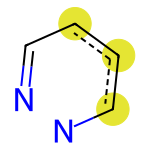

In [85]:
#Display the feature that turn a bit ON
Draw.DrawRDKitBit(first_molecule, 14, bi)

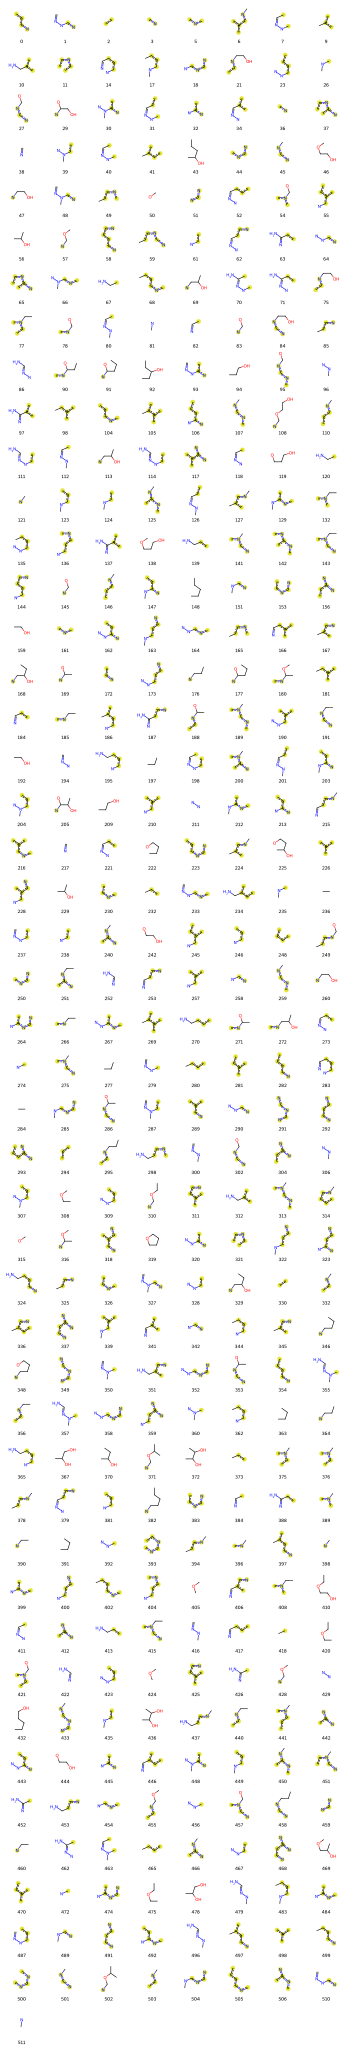

In [86]:
# From https://rdkit.blogspot.com/2018/10/using-new-fingerprint-bit-rendering-code.html
# Visualize more fragments
fragments = [(first_molecule, x, bi) for x in bi]
Draw.DrawRDKitBits(fragments,molsPerRow=8,legends=[str(x) for x in bi])

In [87]:
bi ={}

rdkit_fp2 = RDKFingerprint(second_molecule, maxPath=5, fpSize=512, bitInfo=bi)
rdkit_fp2_arr = np.zeros((0,))
DataStructs.ConvertToNumpyArray(rdkit_fp2, rdkit_fp2_arr)
rdkit_fp2_arr

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 0.

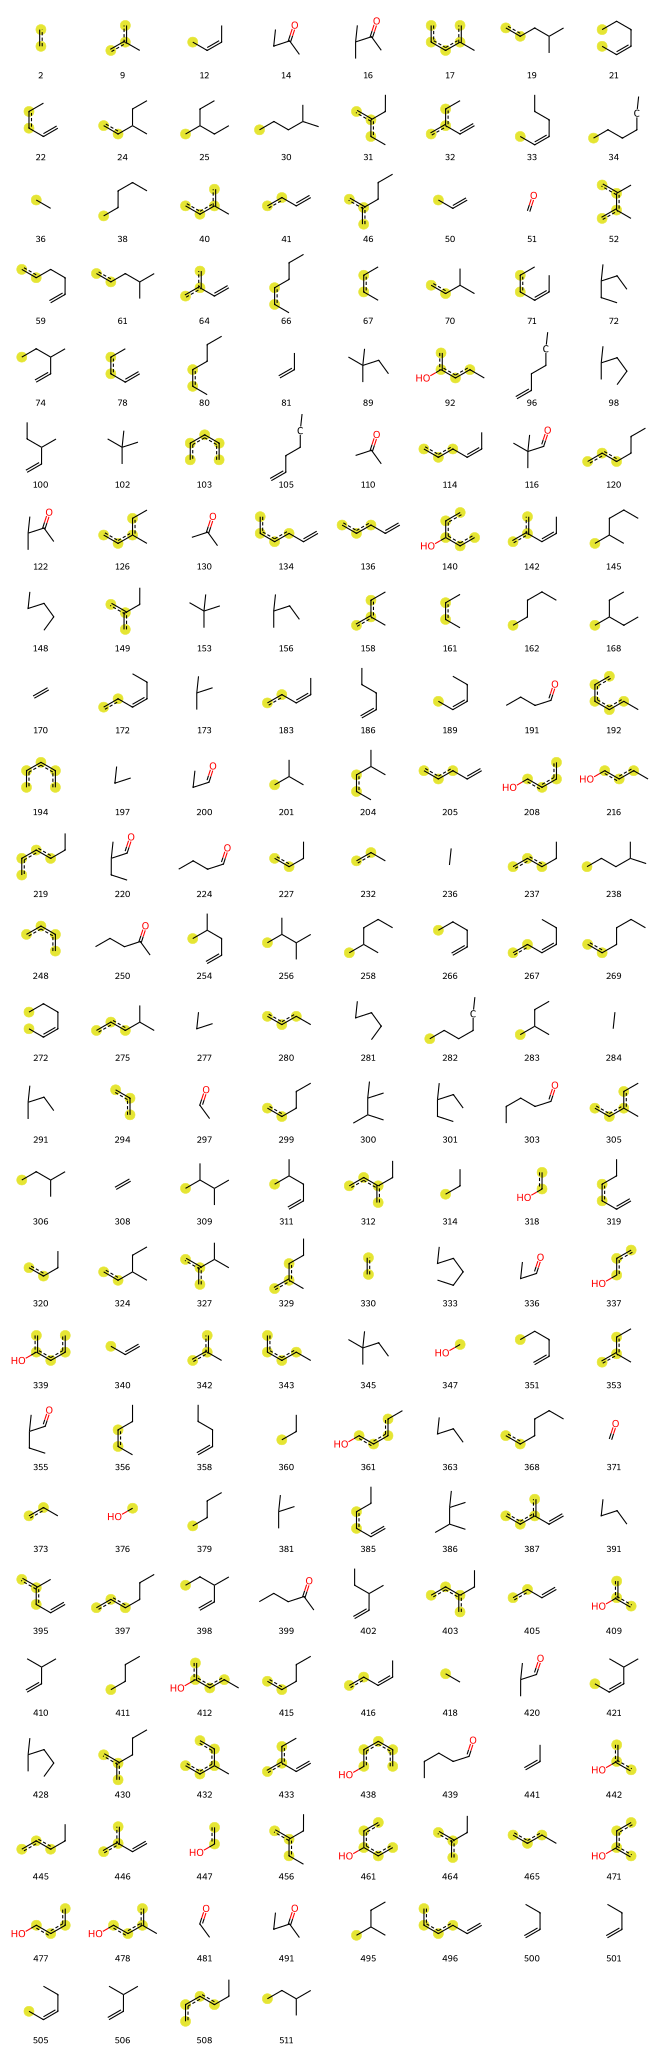

In [88]:
fragments = [(second_molecule, x, bi) for x in bi]
Draw.DrawRDKitBits(fragments,molsPerRow=8,legends=[str(x) for x in bi])

In [89]:
print('first_molecule', list(rdkit_fp.GetOnBits()))
print('second_molecule', list(rdkit_fp2.GetOnBits()))

first_molecule [0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 14, 17, 18, 21, 23, 26, 27, 29, 30, 31, 32, 34, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 75, 77, 78, 80, 81, 82, 83, 84, 85, 86, 90, 91, 92, 93, 94, 95, 96, 97, 98, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 129, 132, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 151, 153, 156, 159, 161, 162, 163, 164, 165, 166, 167, 168, 169, 172, 173, 176, 177, 180, 181, 184, 185, 186, 187, 188, 189, 190, 191, 192, 194, 195, 197, 198, 200, 201, 203, 204, 205, 209, 210, 211, 212, 213, 215, 216, 217, 221, 222, 223, 224, 225, 226, 228, 229, 230, 232, 233, 234, 235, 236, 237, 238, 240, 242, 245, 246, 248, 249, 250, 251, 252, 253, 257, 258, 259, 260, 264, 266, 267, 269, 270, 271, 272, 273, 274, 275, 277, 279, 280, 281, 282, 283, 284, 285, 286, 287, 289, 290, 291, 292, 293, 294, 295, 298, 300, 3

In [90]:
DataStructs.TanimotoSimilarity(rdkit_fp, rdkit_fp2)

0.32941176470588235

**Let's apply it to the whole dataset**

**Option 1**


---

In [91]:
df_rdkit = data.copy()
df_rdkit['RDKit'] = data['Molecule'].apply(lambda x: RDKFingerprint(x, maxPath=5, fpSize=2048))
df_rdkit

PUBCHEM_SMILES  \
0     CN1C2=NC=NC3=C2C(=CN3[C@H]4[C@@H]([C@@H]([C@H]...   
1     C[C@]12CC[C@H]3C(=CCC4=C3C=CC(=C4)O)[C@@H]1CCC2=O   
2     C1=NC2=C(N=C(N=C2N1[C@H]3[C@H]([C@@H]([C@H](O3...   
3     CCOC1=CC2=C(C3=C(C=C(C=C3)N)N=C2C=C1)N.CC(C(=O...   
4               CCCCOC(=O)C1=CC=CC=C1C(=O)OCC2=CC=CC=C2   
...                                                 ...   
5129                                       C(/C=C\Cl)Cl   
5130                              CC(C)OP(OC(C)C)OC(C)C   
5131                                            C1CCSC1   
5132                          CN(CCCC(C1=CN=CC=C1)O)N=O   
5133                         CN(CCCC(=O)C1=CN=CC=C1)N=O   

     PUBCHEM_ACTIVITY_OUTCOME Antagonist Activity Viability Activity  \
0                      Active   active antagonist           inactive   
1                      Active   active antagonist           inactive   
2                      Active   active antagonist           inactive   
3                      Active   active antagonist           inactive   
4                      Active   active antagonist           inactive   
...                       ...                 ...                ...   
5129                 Inactive            inactive           inactive   
5130                 Inactive            inactive           inactive   
5131                 Inactive            inactive           inactive   
5132                 Inactive            inactive           inactive   
5133                 Inactive            inactive           inactive   

      Antagonist Efficacy (%) ID  \
0                    -37.5702      
1                    -37.9252      
2                    -35.8470      
3                    -35.5194      
4                    -39.4007      
...                       ... ..   
5129                   0.0000      
5130                   0.0000      
5131                   0.0000      
5132                   0.0000      
5133                   0.0000      

                                              Molecule  \
0     <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca180>   
1     <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca3b0>   
2     <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca420>   
3     <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca500>   
4     <rdkit.Chem.rdchem.Mol object at 0x7cbf3e7ca5e0>   
...                                                ...   
5129  <rdkit.Chem.rdchem.Mol object at 0x7cbf3d57adc0>   
5130  <rdkit.Chem.rdchem.Mol object at 0x7cbf3d57ae30>   
5131  <rdkit.Chem.rdchem.Mol object at 0x7cbf3d57aea0>   
5132  <rdkit.Chem.rdchem.Mol object at 0x7cbf3d57af10>   
5133  <rdkit.Chem.rdchem.Mol object at 0x7cbf3d57af80>   

                                                  RDKit  
0     [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, ...  
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2     [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...  
3     [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...  
4     [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...  
...                                                 ...  
5129  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
5130  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
5131  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
5132  [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...  
5133  [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...  

[5134 rows x 8 columns]

**Option 2**


---

In [92]:
def rdkit_fps(data, nBits=2048, minPath=1, maxPath=7, useHs=True):
    """Generate RDKit fingerprints and their corresponding bit information for a list of RDKit molecule objects.

    Parameters:
    - data (list of RDKit Mol): List of RDKit Mol objects representing molecules.
    - nBits (int, optional): Desired size of the output fingerprint. Default is 2048 bits.
    - minPath (int, optional): Minimum number of bonds to include in the subgraphs. Default is 1.
    - maxPath (int, optional): Maximum number of bonds to include in the subgraphs. Default is 7.
    - useHs (bool, optional): Include paths to hydrogen atoms. Default is True.

    Returns:
    - tuple:
        - numpy.ndarray: An array where each row corresponds to the RDKit fingerprint of a molecule.
                         Each fingerprint is a binary array of size `nBits`.
        - list: A list of dictionaries where each dictionary contains the bit information
                (indices of non-zero bits) for the corresponding molecule's fingerprint.
        - list: A list of ExplicitBitVect objects representing the fingerprints.
    """
    RDKit_fps = []
    bitInfos = []
    fp_object = []
    for mol in data:
        bitInfo = {}
        fp = RDKFingerprint(mol, minPath=minPath, maxPath=maxPath, fpSize=nBits, useHs=useHs, bitInfo=bitInfo)
        RDKit_fps.append(fp)
        bitInfos.append(bitInfo)
        fp_object.append(fp)

    # Convert the RDKit fingerprints to numpy arrays
    fps_numpy = np.array([list(fp) for fp in RDKit_fps])

    return fps_numpy, bitInfos, fp_object

In [93]:
fps_rdkit, infos, fp_objects = rdkit_fps(data['Molecule'])
fps_rdkit.shape

(5134, 2048)

In [94]:
fps_rdkit

array([[1, 1, 1, ..., 1, 1, 1],
       [0, 1, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1]])

In [95]:
fps_rdkit_df = pd.DataFrame(fps_rdkit,columns=['Col_{}'.format(i) for i in range(fps_rdkit.shape[1])])
fps_rdkit_df

Col_0  Col_1  Col_2  Col_3  Col_4  Col_5  Col_6  Col_7  Col_8  Col_9  \
0         1      1      1      0      1      1      1      1      1      1   
1         0      1      0      0      0      0      0      0      1      0   
2         1      0      0      0      1      1      1      0      1      0   
3         1      0      0      0      0      1      1      0      0      0   
4         1      0      0      0      0      1      1      0      1      1   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5129      0      0      0      0      0      0      0      0      0      0   
5130      0      0      0      0      0      0      0      0      0      0   
5131      0      0      0      0      0      0      0      0      0      0   
5132      1      0      0      0      1      1      0      0      0      0   
5133      1      0      0      0      1      1      0      0      0      0   

      ...  Col_2038  Col_2039  Col_2040  Col_2041  Col_2042  Col_2043  \
0     ...         1         1         0         1         1         1   
1     ...         1         0         0         1         0         0   
2     ...         1         1         1         1         1         1   
3     ...         0         0         0         1         0         0   
4     ...         0         0         0         0         0         0   
...   ...       ...       ...       ...       ...       ...       ...   
5129  ...         0         0         0         0         0         0   
5130  ...         0         0         0         0         0         0   
5131  ...         0         0         0         0         0         0   
5132  ...         0         0         0         1         0         0   
5133  ...         0         0         0         1         1         0   

      Col_2044  Col_2045  Col_2046  Col_2047  
0            0         1         1         1  
1            0         0         1         0  
2            1         1         1         1  
3            0         0         0         0  
4            0         0         0         1  
...        ...       ...       ...       ...  
5129         0         0         0         0  
5130         0         0         0         0  
5131         0         0         0         0  
5132         0         0         0         1  
5133         0         0         0         1  

[5134 rows x 2048 columns]

In [96]:
prints = [(data['Molecule'][16], x, infos[16]) for x in fp_objects[16].GetOnBits()]
Draw.DrawRDKitBits(prints,molsPerRow=8,legends=[str(x) for x in fp_objects[16].GetOnBits()])

Output hidden; open in https://colab.research.google.com to view.

In [97]:
pd.concat([data, fps_rdkit_df], axis=1).to_csv('rdkit_fps.csv', index=False)